# Weather

### Importing the necessary libraries

In [220]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Reading and displaying the data

In [221]:
data = pd.read_csv("processed_data.csv")
data.head()

,Unnamed: 0,year,month,day,hour,Temperature (C),day_of_year
0,0,2006.0,4.0,1.0,0.0,9.472222,91.0
1,1,2006.0,4.0,1.0,1.0,9.355556,91.0
2,2,2006.0,4.0,1.0,2.0,9.377778,91.0
3,3,2006.0,4.0,1.0,3.0,8.288889,91.0
4,4,2006.0,4.0,1.0,4.0,8.755556,91.0


### Checking and removing missing data

In [222]:
data.isnull().sum()

,0
Unnamed: 0,0
year,39984
month,39984
day,39984
hour,39984
Temperature (C),0
day_of_year,39984


In [223]:
data = data.dropna()

### Assigning values to features and target

In [ ]:
X = data[["year","month","day","hour","day_of_year"]].values
Y = data[["Temperature (C)"]].values

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((45175, 5), (11294, 5), (45175, 1), (11294, 1))

### Building a multi-layer neural network

In [230]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5), # input
    tf.keras.layers.Dense(32,activation="relu"), # Hidden 1
    tf.keras.layers.Dense(16,activation="relu"), # Hidden 2
    tf.keras.layers.Dense(1,activation="linear"), # output
])

In [231]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="mse",
              )

### Training the data

In [233]:
result = model.fit(X_train , Y_train,epochs=45)

Epoch 1/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 57.9766
Epoch 2/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 55.8969
Epoch 3/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 54.3394
Epoch 4/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 53.6350
Epoch 5/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 35.8299
Epoch 6/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 33.5149
Epoch 7/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 31.2139
Epoch 8/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 32.0712
Epoch 9/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32.8356
Epoch 10/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.0102
Epoch 11/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 30.6104
Epoch 12/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 29.1725
Epoch 13/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 29.6964
Epoch 14/45
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 28.8477
Epoch 15/45
141

loss_train_mse = 16.06

### show losses 

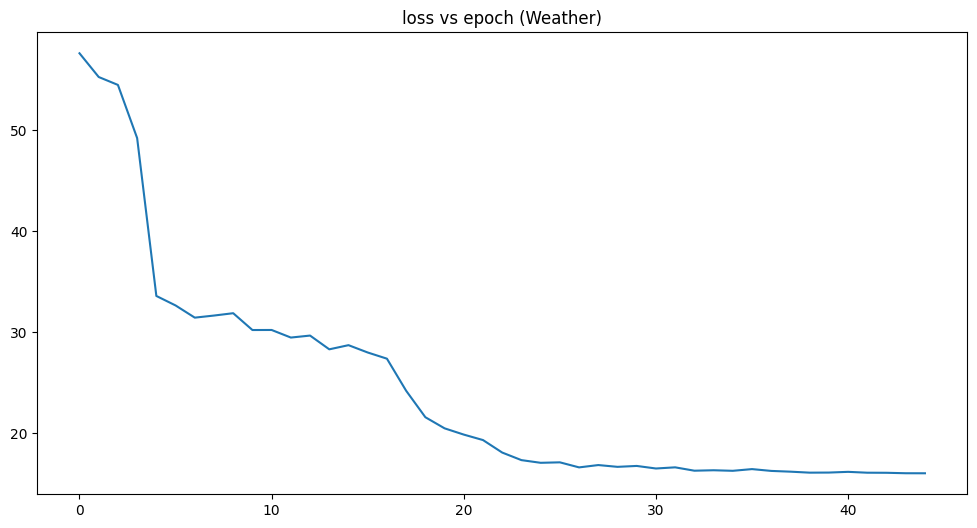

In [235]:
plt.figure(figsize=(12, 6))
plt.plot(result.history["loss"])
plt.title("loss vs epoch (Weather)")
plt.show()

In [236]:
Y_pred = model.predict(X_test)
Y_pred.shape

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(11294, 1)

In [237]:
loss = model.evaluate(X_test,Y_test)
print(f"loss (rmse): {np.sqrt(loss)}")

353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.5311
loss (rmse): 3.9730403268122716


|data      |loss (rmse)|
|----------|----|
|train data|4.007|
|test data |3.9|
